In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from catboost import CatBoostClassifier
import lightgbm as lgb

In [2]:
df = pd.read_csv('data/passwords.csv')
df

,password,strength
0,yrtzuab476,1
1,yEdnN9jc1NgzkkBP,2
2,sarita99,1
3,Suramerica2015,2
4,PPRbMvDIxMQ19TMo,2
...,...,...
99995,aulona044,1
99996,5201314ding,1
99997,isaac19725,1
99998,toji25,0


           password  strength
0        yrtzuab476         1
1  yEdnN9jc1NgzkkBP         2
2          sarita99         1
3    Suramerica2015         2
4  PPRbMvDIxMQ19TMo         2
1    74278
0    13428
2    12294
Name: strength, dtype: int64


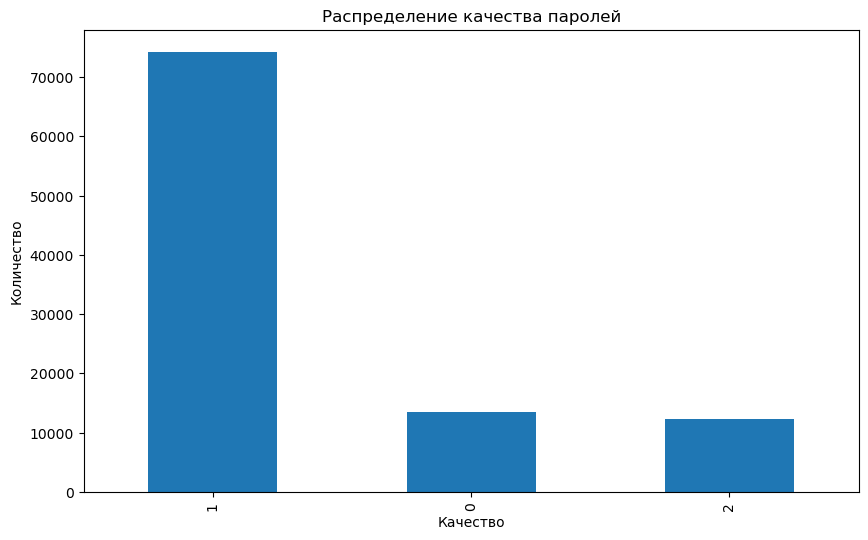

In [3]:
print(df.head())
print(df['strength'].value_counts())


# Визуализация распределения качества паролей
plt.figure(figsize=(10, 6))
df['strength'].value_counts().plot(kind='bar')
plt.title('Распределение качества паролей')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.show()

In [4]:
# Разделение данных
X = df['password']
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Преобразование паролей в числовое представление с использованием TF-IDF
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
# Обучение модели логистической регрессии
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred = logreg.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8578
F1 Score:
               precision    recall  f1-score   support

           0       0.78      0.29      0.43      2686
           1       0.85      0.98      0.91     14855
           2       0.96      0.73      0.83      2459

    accuracy                           0.86     20000
   macro avg       0.86      0.67      0.72     20000
weighted avg       0.85      0.86      0.84     20000

Confusion Matrix:
 [[  785  1887    14]
 [  217 14567    71]
 [    2   653  1804]]


In [5]:
# Обучение модели случайного леса
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.90225
F1 Score:
               precision    recall  f1-score   support

           0       0.89      0.55      0.68      2686
           1       0.89      0.99      0.94     14855
           2       0.99      0.78      0.87      2459

    accuracy                           0.90     20000
   macro avg       0.92      0.77      0.83     20000
weighted avg       0.90      0.90      0.89     20000

Confusion Matrix:
 [[ 1479  1206     1]
 [  180 14653    22]
 [    1   545  1913]]


In [6]:
# Обучение модели XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_clf.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9589
F1 Score:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      2686
           1       0.96      0.98      0.97     14855
           2       0.97      0.93      0.95      2459

    accuracy                           0.96     20000
   macro avg       0.95      0.92      0.94     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
 [[ 2286   400     0]
 [  187 14607    61]
 [    0   174  2285]]


In [10]:
# Обучение модели многослойного перцептрона
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_mlp = mlp.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("F1 Score:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

Accuracy: 0.90135
F1 Score:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      2686
           1       0.92      0.95      0.93     14855
           2       0.94      0.89      0.91      2459

    accuracy                           0.90     20000
   macro avg       0.86      0.83      0.85     20000
weighted avg       0.90      0.90      0.90     20000

Confusion Matrix:
 [[ 1798   882     6]
 [  667 14047   141]
 [    0   277  2182]]


In [11]:
# Обучение модели методом опорных векторов
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_svm = svm.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9027
F1 Score:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65      2686
           1       0.90      0.97      0.94     14855
           2       0.97      0.87      0.92      2459

    accuracy                           0.90     20000
   macro avg       0.90      0.79      0.83     20000
weighted avg       0.90      0.90      0.90     20000

Confusion Matrix:
 [[ 1439  1241     6]
 [  330 14464    61]
 [    1   307  2151]]


In [6]:
# Обучение модели методом К-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.6941
F1 Score:
               precision    recall  f1-score   support

           0       0.22      0.30      0.26      2686
           1       0.79      0.84      0.82     14855
           2       0.95      0.22      0.36      2459

    accuracy                           0.69     20000
   macro avg       0.66      0.45      0.48     20000
weighted avg       0.73      0.69      0.69     20000

Confusion Matrix:
 [[  801  1880     5]
 [ 2296 12536    23]
 [  495  1419   545]]


In [5]:
# Обучение модели CatBoost
cat_clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=500)
cat_clf.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_clf.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("F1 Score:\n", classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

0:	learn: 1.0069813	total: 1.91s	remaining: 31m 48s
500:	learn: 0.1881336	total: 13m 51s	remaining: 13m 47s
999:	learn: 0.1658109	total: 28m 3s	remaining: 0us
Accuracy: 0.93285
F1 Score:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      2686
           1       0.93      0.98      0.96     14855
           2       0.96      0.90      0.93      2459

    accuracy                           0.93     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.93      0.93      0.93     20000

Confusion Matrix:
 [[ 1908   778     0]
 [  214 14546    95]
 [   13   243  2203]]


In [5]:
# Обучение модели LightGBM
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=3, metric='multi_logloss', learning_rate=0.1, n_estimators=1000, force_col_wise=True, )
lgb_clf.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred_lgb = lgb_clf.predict(X_test_tfidf)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("F1 Score:\n", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

[LightGBM] [Info] Total Bins 319311
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 8057
[LightGBM] [Info] Start training from score -2.007865
[LightGBM] [Info] Start training from score -0.297345
[LightGBM] [Info] Start training from score -2.096079
Accuracy: 0.97605
F1 Score:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2686
           1       0.98      0.99      0.98     14855
           2       0.99      0.94      0.96      2459

    accuracy                           0.98     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix:
 [[ 2514   172     0]
 [  136 14689    30]
 [    1   140  2318]]


<h1>Обоснование преобразования данных:</h1><br>
<b>TF-IDF Векторизация:</b><br>
<ul>
    <li>Используется для преобразования текстовых данных (паролей) в числовое представление.</li>
    <li>TfidfVectorizer с параметрами analyzer='char' и ngram_range=(1,3) означает, что мы рассматриваем символы в качестве основных единиц (а не слова), и мы учитываем отдельные символы, биграммы и триграммы. Это помогает улавливать паттерны и зависимости между символами в паролях.</li>
</ul>


<h1>Выбор метода:</h1><br>
<b>LightGBM</b><br>
<ul>
    <li>LightGBM является алгоритмом градиентного бустинга, разработанным Microsoft, который оптимизирован для больших наборов данных и высокой производительности.</li>
    <li>В отличие от традиционных алгоритмов градиентного бустинга, LightGBM использует стратегию обучения на основе листьев (Leaf-wise) вместо стратегии уровня (Level-wise). Это позволяет модели лучше адаптироваться к данным, что, как правило, приводит к лучшей производительности.</li>
    <li>LightGBM эффективно работает с разреженными данными, такими как TF-IDF, и может обрабатывать категориальные признаки напрямую, без необходимости в предварительной кодировке.</li>
    <li>Поддерживает многоклассовую классификацию и обладает встроенными механизмами для обработки несбалансированных данных.</li>
    <li>Быстрее многих других алгоритмов градиентного бустинга, таких как XGBoost, благодаря оптимизациям и параллелизации.</li>
    <li>Имеет множество параметров для тонкой настройки, что предоставляет большую гибкость исследователям и позволяет уменьшить риск переобучения.</li>
</ul>

<h1>Метрики для оценки результата предсказания модели:</h1>
<ul>
    <li><b>Accuracy:</b> Это простая метрика, которая показывает долю правильно классифицированных примеров относительно общего числа примеров. Хорошо подходит для начальной оценки, но не всегда является лучшим показателем для несбалансированных классов.</li>
    <li><b>Precision:</b> Показывает, какая доля из предсказанных позитивных примеров действительно является позитивными.</li>
    <li><b>Recall (чувствительность):</b> Показывает, какая доля из реальных позитивных примеров была предсказана как позитивная.</li>
    <li><b>F1-score:</b> Гармоническое среднее между Precision и Recall, которое предоставляет компромисс между этими двумя метриками. F1-score особенно полезен, когда распределение классов несбалансировано.</li>
    <li><b>Confusion Matrix:</b> Предоставляет матрицу ошибок, показывающую, какие классы были правильно или неправильно классифицированы.Это может помочь в дальнейших итерациях улучшить производительность модели.</li>
</ul>

На основе данных, которые дала модель LightGBM

<b>Accuracy:</b> 0.97605 или 97.605%

<b>Precision (Точность):</b><br>
Для класса 0 (слабый): 0.95 или 95%<br>
Для класса 1 (средний): 0.98 или 98%<br>
Для класса 2 (сильный): 0.99 или 99%<br>

<b>Recall (Чувствительность):</b><br>
Для класса 0 (слабый): 0.94 или 94%<br>
Для класса 1 (средний): 0.99 или 99%<br>
Для класса 2 (сильный): 0.94 или 94%<br>

<b>F1-score:</b><br>
Для класса 0 (слабый): 0.94 или 94%<br>
Для класса 1 (средний): 0.98 или 98%<br>
Для класса 2 (сильный): 0.96 или 96%<br>

<b>Confusion Matrix (Матрица ошибок):</b><br>
Класс 0 (слабый): 2514 правильно классифицированных, 172 неправильно классифицированы как средние, 0 неправильно классифицированы как сильные.<br>
Класс 1 (средний): 14689 правильно классифицированных, 136 неправильно классифицированы как слабые, 30 неправильно классифицированы как сильные.<br>
Класс 2 (сильный): 2318 правильно классифицированных, 1 неправильно классифицированы как слабые, 140 неправильно классифицированы как средние.<br>
<br>
Эти показатели подтверждают, что модель LightGBM очень эффективно справляется с классификацией паролей на предоставленном датасете, особенно для средних и сильных паролей. Слабый класс паролей также демонстрирует высокую степень точности, но имеется небольшая доля ошибок при классификации их как средних.

В заключение, учитывая такую высокую степень точности и другие ключевые метрики классификации, можно утверждать, что использованный подход и модель являются оптимальными для решения данной задачи.

In [ ]:
def predict_password_strength():
    
    password = input("Введите пароль для проверки: ")
    
    # Преобразование пароля с помощью ранее обученного TF-IDF векторизатора
    password_tfidf = vectorizer.transform([password])
    
    # Предсказание с помощью модели
    strength = lgb_clf.predict(password_tfidf)[0]
    
    strength_mapping = {0: 'слабый', 1: 'средний', 2: 'сильный'}
    return strength_mapping[strength]

# Пример использования:
print(predict_password_strength())